In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [158]:
#Memanggil data csv
df = pd.read_csv('credit.csv')
df.shape

(1000, 17)

In [159]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [160]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [162]:
#mengecek missing value
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [163]:
#mengecek duplikasi data
df.duplicated().sum()

0

C:\Users\Harry\AppData\Local\Temp\ipykernel_20276\1781118391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=df, palette=palette)


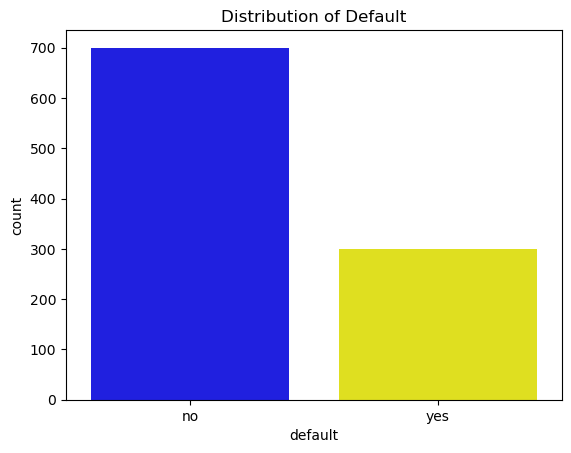

In [164]:
palette = {'yes': 'yellow', 'no': 'blue'}

sns.countplot(x='default', data=df, palette=palette)
plt.title('Distribution of Default')
plt.show()

In [165]:
#menampilkan data dengan tipe interger float/double dan angka lainya
Num_Feature = df.select_dtypes(include=np.number)
Num_Feature


,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1
996,30,3857,4,4,40,1,1
997,12,804,4,4,38,1,1
998,45,1845,4,4,23,1,1


In [166]:
#mengubah semua data object dan kategorical menjadi sebuah label
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = df[col]

In [167]:
#menampilkan korelasi data dengan default
correlation = df.corr()
print(correlation['default'].sort_values(ascending=False))

default                 1.000000
months_loan_duration    0.214927
credit_history          0.193730
amount                  0.154739
percent_of_income       0.072404
housing                 0.019315
employment_duration     0.008932
years_at_residence      0.002967
dependents             -0.003015
job                    -0.032756
phone                  -0.036466
existing_loans_count   -0.045732
other_credit           -0.053862
purpose                -0.055675
age                    -0.091127
savings_balance        -0.103133
checking_balance       -0.302406
Name: default, dtype: float64


In [168]:
#memilih target fitur dan memecahkan data uji dan latih
X = df.drop('default',axis = 1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
#menggunakan metode neural network untuk klasifikasi
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, solver='adam', random_state=42)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

#menampilkan evaluasinya dalam bentuk confusion matrix dan report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

Confusion Matrix:
[[130  11]
 [ 46  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       141
           1       0.54      0.22      0.31        59

    accuracy                           0.71       200
   macro avg       0.64      0.57      0.57       200
weighted avg       0.68      0.71      0.67       200

